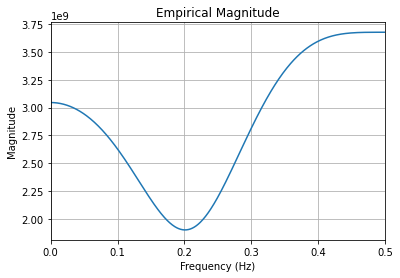

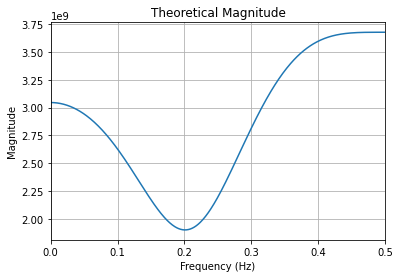

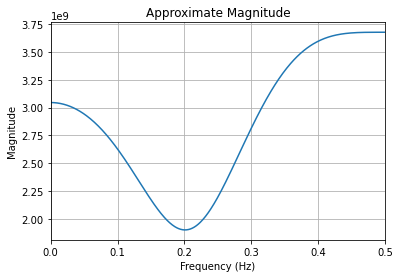

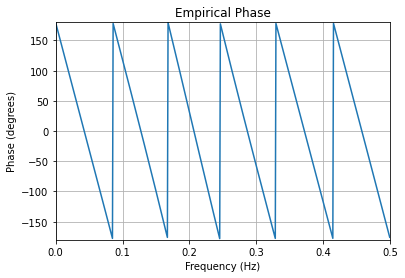

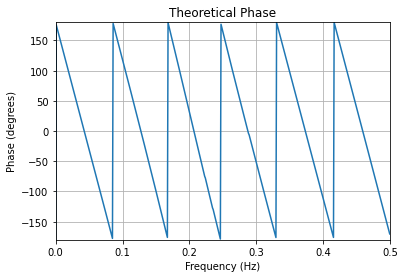

In [2]:
import numpy as np
import scipy.signal as dsp
import matplotlib.pyplot as plt

#####################################################################################################################################
#####################################################################################################################################
#####################################################################################################################################

def generateComplexRoots(num_roots):

  angle_degs = np.random.uniform(0.1, 180, num_roots)
  magnitudes = np.random.uniform(0.1, 3, num_roots)

  complex_roots = magnitudes*np.exp(1j*np.deg2rad(angle_degs))

  return complex_roots

#####################################################################################################################################
#####################################################################################################################################
#####################################################################################################################################

def generateNegativeRealRoots(num_roots):

  negative_real_roots = np.random.uniform(1, 10, num_roots)

  return negative_real_roots

#####################################################################################################################################
#####################################################################################################################################
#####################################################################################################################################

def generatePositiveRealRoots(num_roots):

  positive_real_roots = np.random.uniform(1, 10, num_roots)

  return positive_real_roots

#####################################################################################################################################
#####################################################################################################################################
#####################################################################################################################################

def complexConjugateRootPairZTransformCoefficients(complex_root):

  gamma_real = np.real(complex_root)
  gamma_imag_abs = np.imag(complex_root)

  if(gamma_imag_abs < 0):
    raise ValueError('All positive roots in the frequency magnitude must have positive imaginary components')

  eta = 0.5*(np.square(gamma_real) + np.square(gamma_imag_abs) + 1)
  gamma = np.sqrt(eta + np.sqrt(np.square(eta) - np.square(gamma_real)))
  rho_abs = gamma + np.sqrt(np.square(gamma) - 1)

  z_transform_coeff_array = [1, 2*rho_abs*gamma_real/gamma, np.square(rho_abs)]

  return z_transform_coeff_array

#####################################################################################################################################
#####################################################################################################################################
#####################################################################################################################################

def realNegativeRootZTransformCoefficents(Gamma):

  rho_abs = Gamma + np.sqrt(np.square(Gamma) - 1)

  z_transform_coeff_array = [1, rho_abs]

  return z_transform_coeff_array

#####################################################################################################################################
#####################################################################################################################################
#####################################################################################################################################

def realPositiveRootZTransformCoefficents(Gamma):

  rho_abs = Gamma + np.sqrt(np.square(Gamma) - 1)

  z_transform_coeff_array = [1, -rho_abs]

  return z_transform_coeff_array

#####################################################################################################################################
#####################################################################################################################################
#####################################################################################################################################

def complexConjugateRootPairFreqz(complex_root, omega):

  gamma_real = np.real(complex_root)
  gamma_imag_abs = np.imag(complex_root)

  if(gamma_imag_abs < 0):
    raise ValueError('All positive roots in the frequency magnitude must have positive imaginary components')

  eta = 0.5*(np.square(gamma_real) + np.square(gamma_imag_abs) + 1)
  gamma = np.sqrt(eta + np.sqrt(np.square(eta) - np.square(gamma_real)))
  rho_abs = gamma + np.sqrt(np.square(gamma) - 1)

  cos_omega = np.cos(omega)
  sin_omega = np.sin(omega)
  quant_1 = gamma_real/(rho_abs*gamma)
  quant_2 = quant_1/2

  theo_mag = 2*rho_abs*np.sqrt(np.square(cos_omega + gamma_real) + np.square(gamma_imag_abs))

  arctan_num = 2*sin_omega*(cos_omega + quant_1)
  arctan_den = 2*np.square(cos_omega + quant_2) - 2*np.square(quant_2) + (1/np.square(rho_abs)) - 1
  theo_phase_deg = -np.rad2deg(np.arctan2(arctan_num, arctan_den))

  squared_freq_mag_coeffs = 4*np.square(rho_abs)*np.array([1, 2*gamma_real, np.square(gamma_real) + np.square(gamma_imag_abs)])

  return [theo_mag, theo_phase_deg, squared_freq_mag_coeffs]

#####################################################################################################################################
#####################################################################################################################################
#####################################################################################################################################

def realNegativeRootFreqz(Gamma, omega):

  rho_abs = Gamma + np.sqrt(np.square(Gamma) - 1)

  cos_omega = np.cos(omega)
  sin_omega = np.sin(omega)

  theo_mag = np.sqrt(2*rho_abs*(Gamma + cos_omega))

  arctan_num = sin_omega
  arctan_den = (1/rho_abs) + cos_omega
  theo_phase_deg = -np.rad2deg(np.arctan2(arctan_num, arctan_den))

  squared_freq_mag_coeffs = 2*rho_abs*np.array([1, Gamma])

  return [theo_mag, theo_phase_deg, squared_freq_mag_coeffs]

#####################################################################################################################################
#####################################################################################################################################
#####################################################################################################################################

def realPositiveRootFreqz(Gamma, omega):

  rho_abs = Gamma + np.sqrt(np.square(Gamma) - 1)

  cos_omega = np.cos(omega)
  sin_omega = np.sin(omega)

  theo_mag = np.sqrt(-2*rho_abs*(cos_omega - Gamma))

  arctan_num = sin_omega
  arctan_den = (1/rho_abs) - cos_omega
  theo_phase_deg = np.rad2deg(np.arctan2(arctan_num, arctan_den))

  squared_freq_mag_coeffs = 2*rho_abs*np.array([-1, Gamma])

  return [theo_mag, theo_phase_deg, squared_freq_mag_coeffs]

#####################################################################################################################################
#####################################################################################################################################
#####################################################################################################################################

def plot(omega, h_emp_mag, h_theo_mag, h_emp_phase, h_theo_phase_deg, h_approx_mag):

  freq = omega/(2*np.pi)

  plt.figure()
  plt.plot(freq, h_emp_mag)
  plt.xlim(0, 0.5)
  plt.grid()
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Magnitude')
  plt.title('Empirical Magnitude')

  plt.figure()
  plt.plot(freq, h_theo_mag)
  plt.xlim(0, 0.5)
  plt.grid()
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Magnitude')
  plt.title('Theoretical Magnitude')

  plt.figure()
  plt.plot(freq, h_approx_mag)
  plt.xlim(0, 0.5)
  plt.grid()
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Magnitude')
  plt.title('Approximate Magnitude')

  plt.figure()
  plt.plot(freq, h_emp_phase)
  plt.xlim(0, 0.5)
  plt.ylim(-180, 180)
  plt.grid()
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Phase (degrees)')
  plt.title('Empirical Phase')

  plt.figure()
  plt.plot(freq, h_theo_phase_deg)
  plt.xlim(0, 0.5)
  plt.ylim(-180, 180)
  plt.grid()
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Phase (degrees)')
  plt.title('Theoretical Phase')

  plt.show()

#####################################################################################################################################
#####################################################################################################################################
#####################################################################################################################################

if (__name__=='__main__'):

#####################################################################################################################################

  num_complex_roots       = 3
  num_real_negative_roots = 3
  num_real_positive_roots = 3

  complex_roots = generateComplexRoots(num_complex_roots)
  negative_real_roots = generateNegativeRealRoots(num_real_negative_roots)
  positive_real_roots = generatePositiveRealRoots(num_real_positive_roots)

#####################################################################################################################################

  z_transform_coeffs = np.array([1])

  for idx in np.arange(0, num_complex_roots, 1):
    z_transform_coeffs = np.convolve(z_transform_coeffs, complexConjugateRootPairZTransformCoefficients(complex_roots[idx]))

  for idx in np.arange(0, num_real_negative_roots, 1):
    z_transform_coeffs = np.convolve(z_transform_coeffs, realNegativeRootZTransformCoefficents(negative_real_roots[idx]))

  for idx in np.arange(0, num_real_positive_roots, 1):
    z_transform_coeffs = np.convolve(z_transform_coeffs, realPositiveRootZTransformCoefficents(positive_real_roots[idx]))

#####################################################################################################################################

  [omega, h_emp] = dsp.freqz(z_transform_coeffs)
  h_emp_mag = np.abs(h_emp)
  h_emp_phase = np.rad2deg(np.angle(h_emp))

#####################################################################################################################################

  h_theo_mag = np.ones(shape=omega.shape)
  h_theo_phase_deg = np.zeros(shape=omega.shape)

  total_squared_freq_mag_coeffs = np.array([1])

  for idx in np.arange(0, num_complex_roots, 1):
    [theo_mag, theo_phase_deg, squared_freq_mag_coeffs] = complexConjugateRootPairFreqz(complex_roots[idx], omega)
    h_theo_mag = h_theo_mag*theo_mag
    h_theo_phase_deg = h_theo_phase_deg + np.unwrap(theo_phase_deg)
    total_squared_freq_mag_coeffs = np.convolve(total_squared_freq_mag_coeffs, squared_freq_mag_coeffs)

  for idx in np.arange(0, num_real_negative_roots, 1):
    [theo_mag, theo_phase_deg, squared_freq_mag_coeffs] = realNegativeRootFreqz(negative_real_roots[idx], omega)
    h_theo_mag = h_theo_mag*theo_mag
    h_theo_phase_deg = h_theo_phase_deg + np.unwrap(theo_phase_deg)
    total_squared_freq_mag_coeffs = np.convolve(total_squared_freq_mag_coeffs, squared_freq_mag_coeffs)
  
  for idx in np.arange(0, num_real_positive_roots, 1):
    [theo_mag, theo_phase_deg, squared_freq_mag_coeffs] = realPositiveRootFreqz(positive_real_roots[idx], omega)
    h_theo_mag = h_theo_mag*theo_mag
    h_theo_phase_deg = h_theo_phase_deg + np.unwrap(theo_phase_deg)
    total_squared_freq_mag_coeffs = np.convolve(total_squared_freq_mag_coeffs, squared_freq_mag_coeffs)

  h_theo_phase_deg = ((h_theo_phase_deg + 180) % 360) - 180

#####################################################################################################################################

  h_approx_mag_squared = np.zeros(shape=omega.shape)
  fourier_series_coeffs = np.polynomial.chebyshev.poly2cheb(np.flip(total_squared_freq_mag_coeffs))

  h_approx_mag_squared = h_approx_mag_squared + fourier_series_coeffs[0]
  for n in np.arange(1, fourier_series_coeffs.shape[0], 1):
    h_approx_mag_squared = h_approx_mag_squared + fourier_series_coeffs[n]*np.cos(n*omega)
  
  h_approx_mag = np.sqrt(h_approx_mag_squared)

#####################################################################################################################################

  plot(omega, h_emp_mag, h_theo_mag, h_emp_phase, h_theo_phase_deg, h_approx_mag)

#####################################################################################################################################
